# The ROC curve

First, let's build a simple linear model for illustration purposes (for classification we use logistic regression).

In [3]:
##### added line to ensure plots are showing
%matplotlib inline
#####

import matplotlib.pyplot as plt
import sklearn.datasets as datasets

from sklearn.metrics import auc
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score as f1
from sklearn.metrics import precision_recall_curve as pc_curve
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import confusion_matrix as cm

from sklearn.tree import DecisionTreeClassifier

dataset = datasets.load_breast_cancer()
X = dataset['data']
y = dataset['target']
print('The length of X: '+str(len(X)))

# create a DecisionTreeClassifier object
classification = DecisionTreeClassifier()
# select 300 samples, and then fit data
classification.fit(X[:300],y[:300])

# calculate predicted values of 300 x values
prediction = classification.predict(X[300:])

# This is training a model with 300 selected samples.
# then we use remaining 269 samples to check if our model is good.


The length of X: 569


Next, we obtain some evaluation metrics, with built-in functions.

In [4]:
print("Recall: "+str(recall(y[300:],prediction)))
print("Precision: "+str(precision(y[300:],prediction)))
print("F1 score: "+str(f1(y[300:],prediction)))
print("Confusion matrix: \n"+str(cm(y[300:],prediction)))

Recall: 0.8866995073891626
Precision: 0.989010989010989
F1 score: 0.935064935064935
Confusion matrix: 
[[ 64   2]
 [ 23 180]]


## ROC curve

Now, let's build the ROC curve:

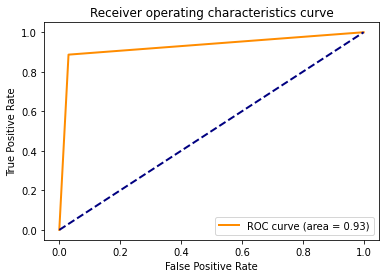

In [5]:
# Compute precision-recall pairs for different probability thresholds.
#
# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
# The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

# The last precision and recall values are 1 and 0 respectively and do not have a corresponding threshold.
# This ensures that the graph starts on the y axis.

# The first precision and recall values are precision=class balance and recall=1.0 which corresponds to a classifier that always predicts the positive class.
# precision, recall, _ = pc_curve(y[300:],prediction)
# _ should return a threshold correspondingly, but we will not use it.
# _ is a name, you can ignore it.


# Compute Receiver operating characteristic (ROC)
fpr, tpr, thresholds = roc(y[300:],prediction)


# Compute Area Under the Curve (AUC) using the trapezoidal rule.
# This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score.
# For an alternative way to summarize a precision-recall curve, see average_precision_score.
roc_auc = auc(fpr,tpr)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver operating characteristics curve')
plt.legend(loc="lower right")
plt.show()